In [28]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [ ]:
pocket_residues = [91,151,154,155,158,209,213,380,383]
water_selection = "resname TIP3 and name OH2"  # TIP3 water oxygen
data = pd.DataFrame()
chain_ids = ['A','B','C','D']   # extract chain letter, e.g. dD8 → D

u = mda.Universe(f"EOL/nopbc.pdb", f"EOL/nopbc.xtc")
waters = u.select_atoms(f"{water_selection}")  # select water atoms
for chain_id in chain_ids:
    water_counts = []
    for ts in u.trajectory:
        pocket_atoms = u.select_atoms(f"chainID {chain_id} and resid {' '.join(map(str, pocket_residues))}")
        hull = Delaunay(pocket_atoms.positions) # define hull
        inside = hull.find_simplex(waters.positions) # water inside hull
        water_counts.append(np.sum(inside >= 0)) # -1 mean outside the hull, only sum water inside the hull
    data[f"{chain_id}"] = water_counts 
data.to_csv(f"EOL_water.csv")

In [ ]:
pocket_residues = [91,151,154,155,158,209,213,380,383]
water_selection = "resname TIP3 and name OH2"  # TIP3 water oxygen
data = pd.DataFrame()
chain_ids = ['A','B','C','D']   # extract chain letter, e.g. dD8 → D

u = mda.Universe(f"DEET/nopbc.pdb", f"DEET/nopbc.xtc")
waters = u.select_atoms(f"{water_selection}")  # select water atoms
for chain_id in chain_ids:
    water_counts = []
    for ts in u.trajectory:
        pocket_atoms = u.select_atoms(f"chainID {chain_id} and resid {' '.join(map(str, pocket_residues))}")
        hull = Delaunay(pocket_atoms.positions) # define hull
        inside = hull.find_simplex(waters.positions) # water inside hull
        water_counts.append(np.sum(inside >= 0)) # -1 mean outside the hull, only sum water inside the hull
    data[f"{chain_id}"] = water_counts 
data.to_csv(f"DEET_water.csv")

In [ ]:
pocket_residues = [91,151,154,155,158,209,213,380,383]
water_selection = "resname TIP3 and name OH2"  # TIP3 water oxygen
data = pd.DataFrame()
chain_ids = ['A','B','C','D']   # extract chain letter, e.g. dD8 → D

u = mda.Universe(f"apo/nopbc.pdb", f"apo/nopbc.xtc")
waters = u.select_atoms(f"{water_selection}")  # select water atoms
for chain_id in chain_ids:
    water_counts = []
    for ts in u.trajectory:
        pocket_atoms = u.select_atoms(f"chainID {chain_id} and resid {' '.join(map(str, pocket_residues))}")
        hull = Delaunay(pocket_atoms.positions) # define hull
        inside = hull.find_simplex(waters.positions) # water inside hull
        water_counts.append(np.sum(inside >= 0)) # -1 mean outside the hull, only sum water inside the hull
    data[f"{chain_id}"] = water_counts 
data.to_csv(f"apo_water.csv")

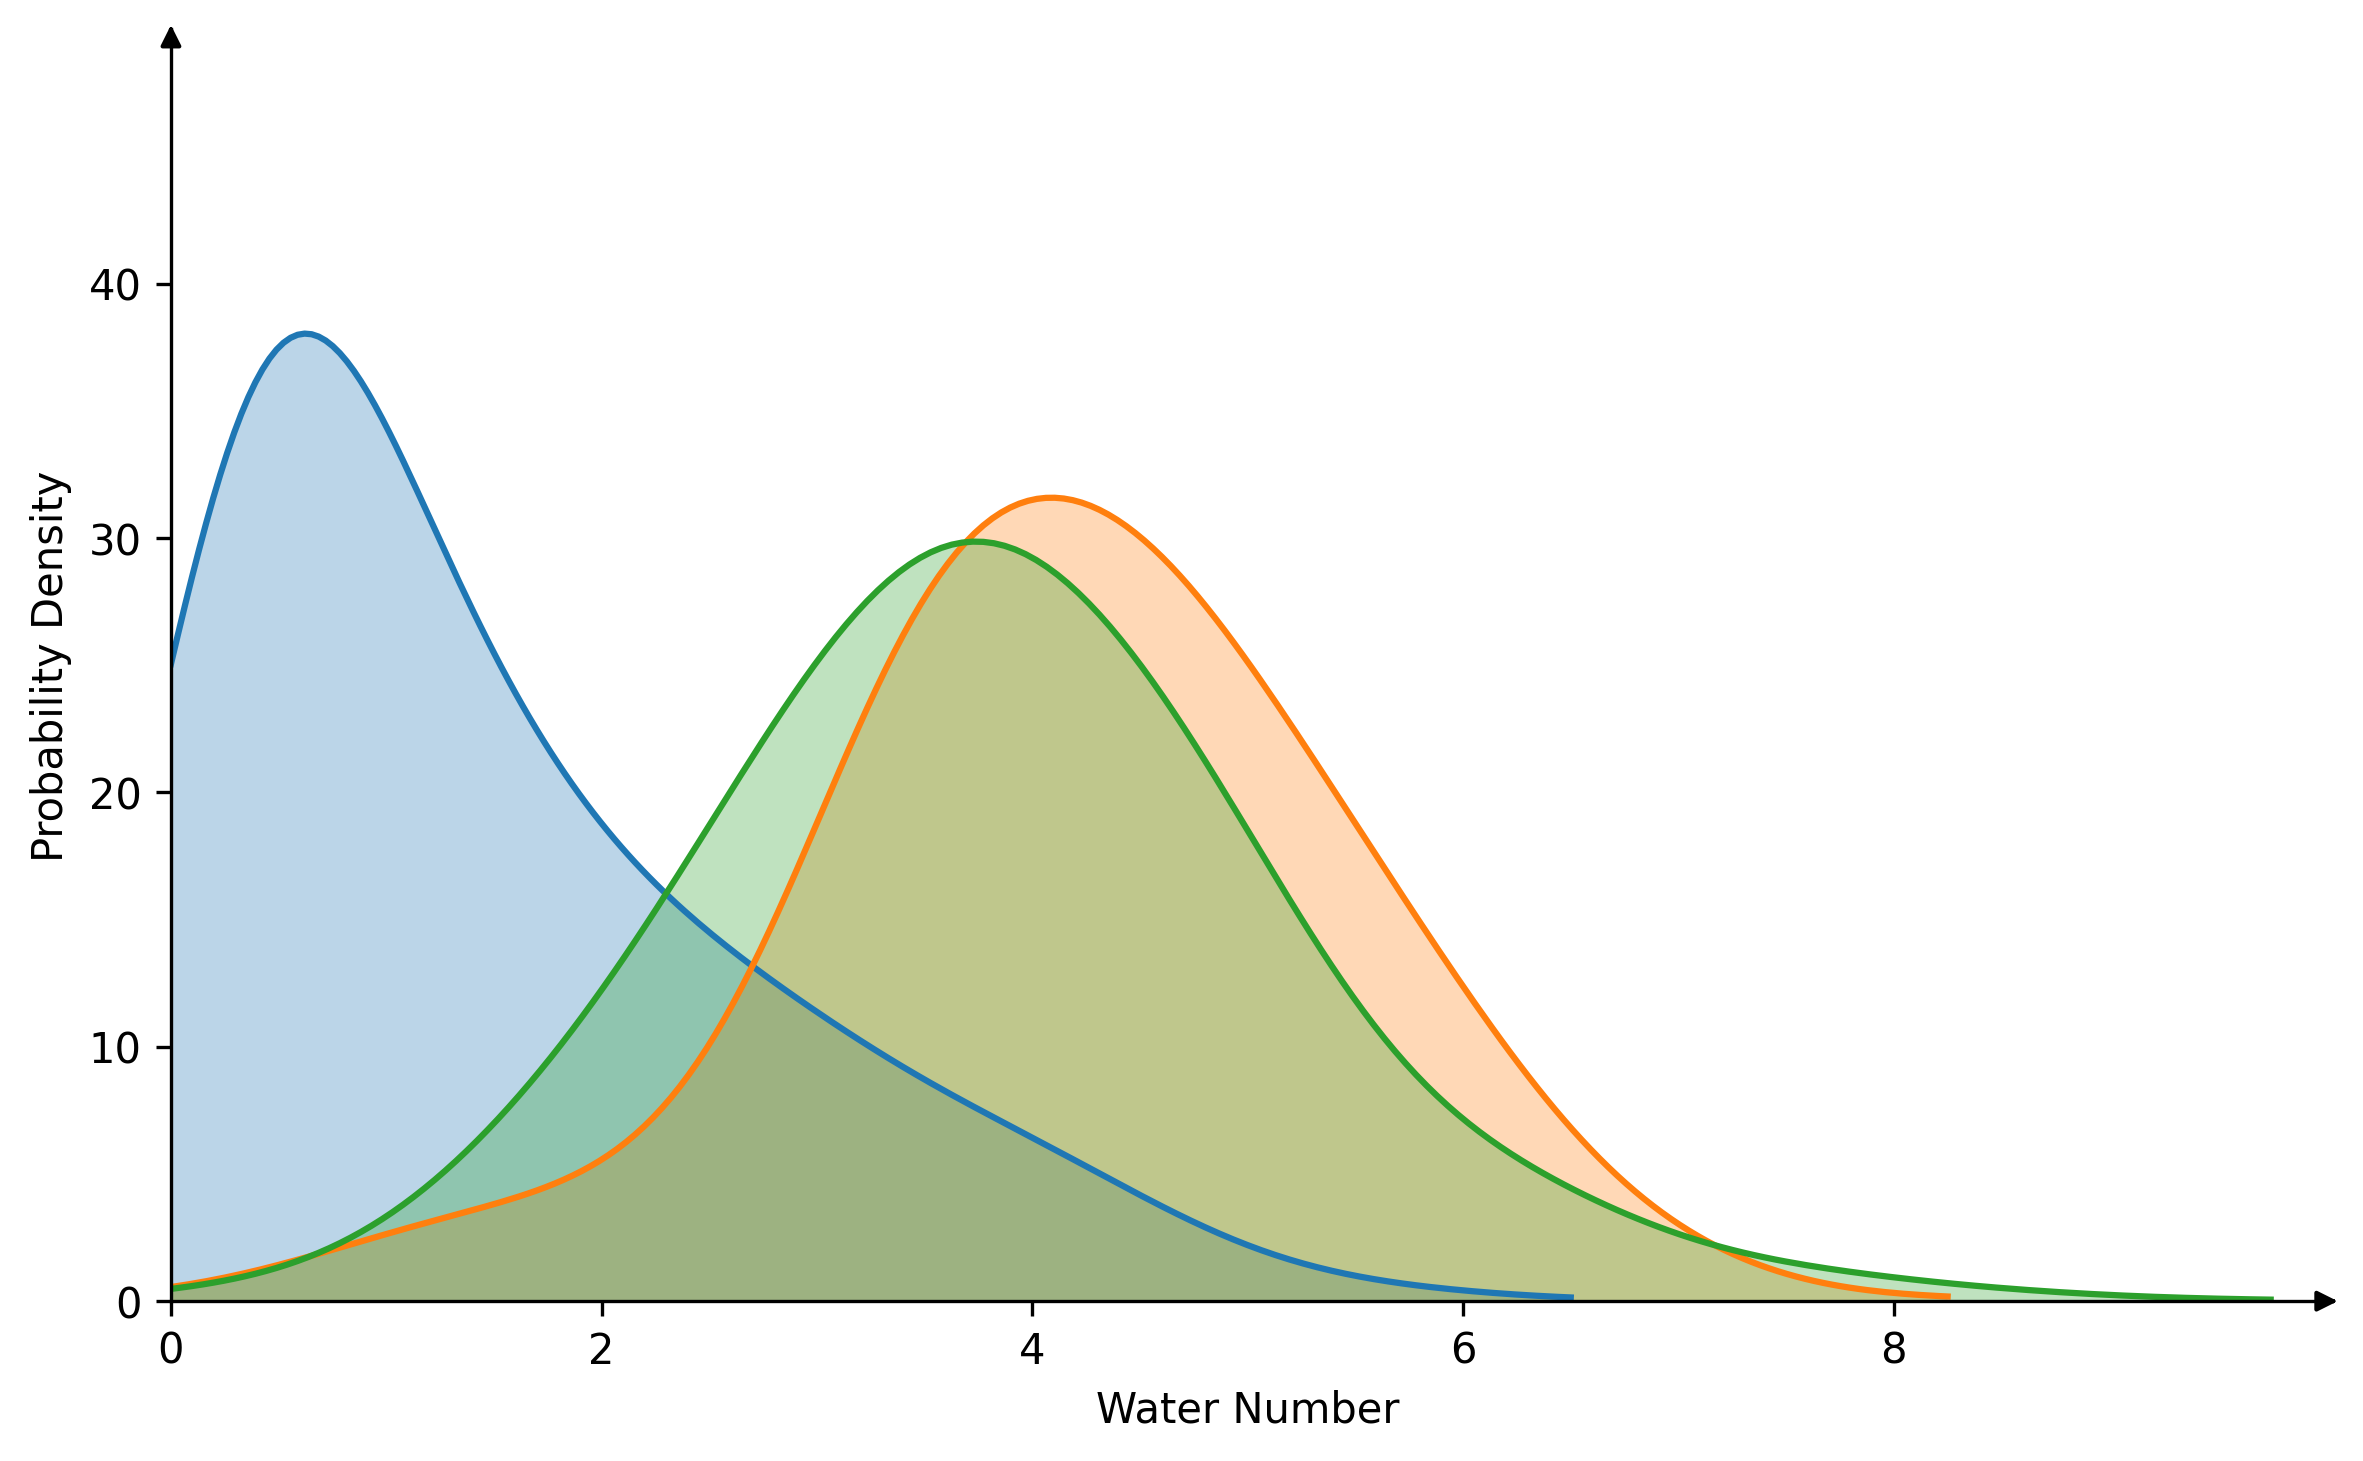

In [60]:
filepath = ["EOL_water.csv", "DEET_water.csv","apo_water.csv"]

plt.figure(figsize=(8,5), dpi=300)
for file in filepath:
    data = []
    df = pd.read_csv(file, sep=",")
    df["time"] = df.iloc[:,0]
    values = (df["A"]+df["B"]+df["C"]+df["D"])/4
    kde = gaussian_kde(values, bw_method=0.4)
    x = np.linspace(np.min(values), np.max(values), 200)
    plt.plot(x, kde(x)*100)
    plt.fill_between(x, kde(x)*100,  alpha=0.3, linewidth=0)
ax = plt.subplot()
ax.spines[['right', 'top']].set_visible(False)
ax.annotate("", xy=(1.01, 0), xycoords=("axes fraction", "data"),
            xytext=(0.999, 0), textcoords=("axes fraction", "data"),
            arrowprops=dict(arrowstyle="-|>", linewidth=1, color="black"))
ax.annotate("", xy=(0, 1.01), xycoords=("data", "axes fraction"),
            xytext=(0, 0.99), textcoords=("data", "axes fraction"),
            arrowprops=dict(arrowstyle="-|>", linewidth=1, color="black"))
plt.xticks(np.arange(0,10,2))
plt.xlim(0,10)
plt.yticks(np.arange(0,50,10))
plt.ylim(0,50)
plt.xlabel("Water Number")
plt.ylabel("Probability Density")
plt.tight_layout()
plt.savefig(f"waternum.pdf", dpi=300, transparent=True)
plt.show()